In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
marketing_data = pd.read_csv('cleaned_train.csv')
marketing_data.head()

,id,target,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
0,432148809,no,27,may,166,623,30,female,worker,married,highSchool,no,-202,no,no,unknown,2,-1.0,0,unknown
1,432184318,no,26,oct,183,1992,42,female,manager,married,uniGraduated,no,2463,no,no,cellPhone,2,-1.0,0,unknown
2,432182482,no,5,jun,227,2778,26,female,services,single,highSchool,no,2158,yes,yes,landline,1,-1.0,0,unknown
3,432150520,no,2,jun,31,3070,34,male,unemployed,divorced,uniGraduated,yes,75,yes,no,unknown,3,-1.0,0,unknown
4,432145870,no,15,may,1231,6583,48,male,worker,married,secondarySchool,no,559,yes,no,unknown,2,-1.0,0,unknown


Text(0.5, 0, 'length of campaign')

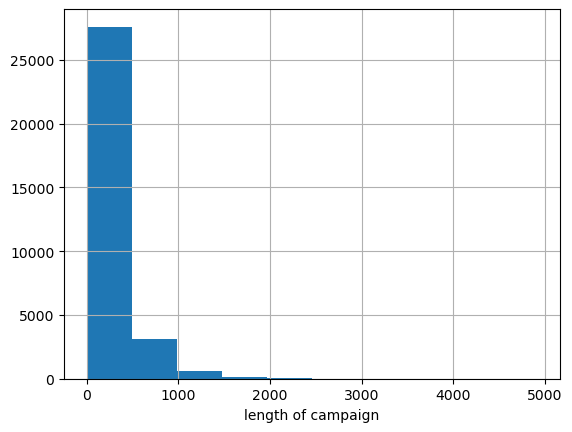

In [4]:
marketing_data['duration'].hist()
plt.xlabel('length of campaign')

In [5]:
marketing_data['lastCampaignResult'].value_counts()

unknown    25746
failure     3403
other       1294
success     1037
Name: lastCampaignResult, dtype: int64

In [6]:
marketing_data['target'].value_counts()

no     27780
yes     3700
Name: target, dtype: int64

In [9]:
yes_target = marketing_data[marketing_data['target'] == 'yes'].copy()

yes_target.head()

,id,target,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
6,432186620,yes,23,jul,251,24594,30,female,student,single,uniGraduated,no,3026,no,no,cellPhone,1,535.0,1,failure
15,432172640,yes,5,feb,917,41689,27,female,manager,single,uniGraduated,no,2648,no,no,cellPhone,1,-1.0,0,unknown
21,432186037,yes,13,may,620,49718,34,male,technical,single,uniGraduated,no,2838,yes,no,cellPhone,3,-1.0,0,unknown
32,432155413,yes,8,jul,740,76903,33,male,entrepreneur,married,highSchool,no,-627,yes,yes,cellPhone,1,-1.0,0,unknown
37,432186043,yes,13,may,289,94280,77,female,retired,married,secondarySchool,no,3324,no,no,cellPhone,1,91.0,5,success


In [10]:
no_target = marketing_data[marketing_data['target'] == 'no'].copy()

no_target.head()

,id,target,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
0,432148809,no,27,may,166,623,30,female,worker,married,highSchool,no,-202,no,no,unknown,2,-1.0,0,unknown
1,432184318,no,26,oct,183,1992,42,female,manager,married,uniGraduated,no,2463,no,no,cellPhone,2,-1.0,0,unknown
2,432182482,no,5,jun,227,2778,26,female,services,single,highSchool,no,2158,yes,yes,landline,1,-1.0,0,unknown
3,432150520,no,2,jun,31,3070,34,male,unemployed,divorced,uniGraduated,yes,75,yes,no,unknown,3,-1.0,0,unknown
4,432145870,no,15,may,1231,6583,48,male,worker,married,secondarySchool,no,559,yes,no,unknown,2,-1.0,0,unknown


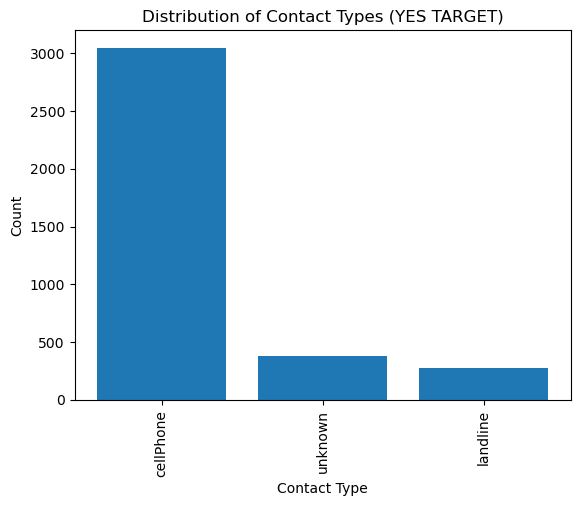

In [12]:
contacttype_counts = yes_target['contactType'].value_counts()

# Plotting the bar chart
plt.bar(range(len(contacttype_counts)), contacttype_counts.values)
plt.xlabel('Contact Type')
plt.ylabel('Count')
plt.title('Distribution of Contact Types (YES TARGET)')
plt.xticks(range(len(contacttype_counts)), contacttype_counts.index, rotation=90)
plt.show()

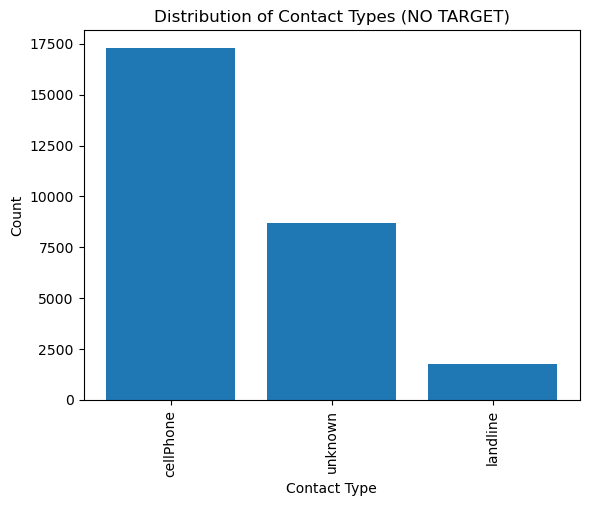

In [13]:
contacttype_counts_no = no_target['contactType'].value_counts()

# Plotting the bar chart
plt.bar(range(len(contacttype_counts_no)), contacttype_counts_no.values)
plt.xlabel('Contact Type')
plt.ylabel('Count')
plt.title('Distribution of Contact Types (NO TARGET)')
plt.xticks(range(len(contacttype_counts_no)), contacttype_counts_no.index, rotation=90)
plt.show()

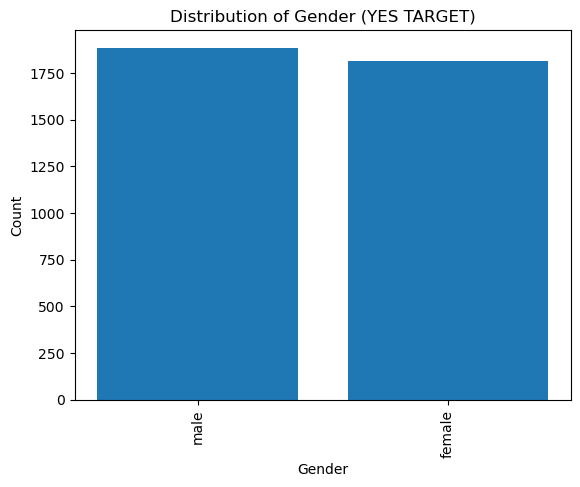

In [14]:
gender_counts = yes_target['gender'].value_counts()

# Plotting the bar chart
plt.bar(range(len(gender_counts)), gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender (YES TARGET)')
plt.xticks(range(len(gender_counts)), gender_counts.index, rotation=90)
plt.show()

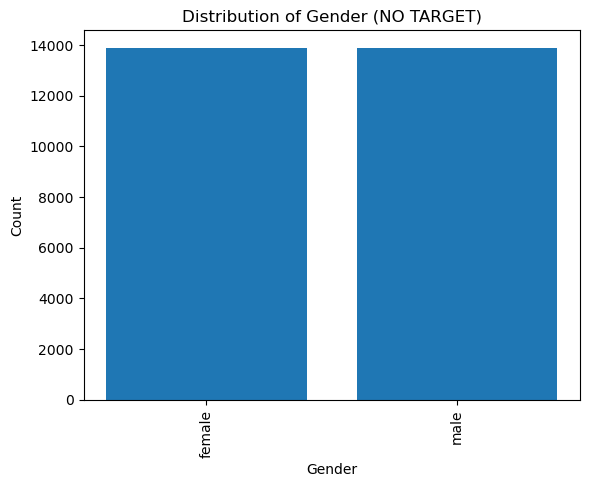

In [15]:
gender_counts_no = no_target['gender'].value_counts()

# Plotting the bar chart
plt.bar(range(len(gender_counts_no)), gender_counts_no.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender (NO TARGET)')
plt.xticks(range(len(gender_counts_no)), gender_counts_no.index, rotation=90)
plt.show()

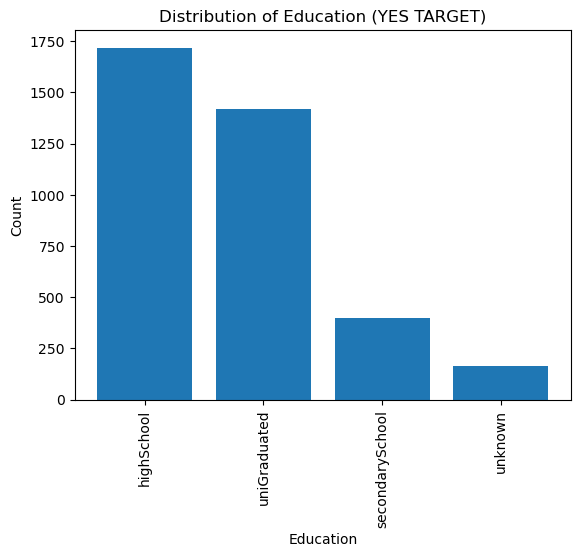

In [16]:
edu_counts = yes_target['education'].value_counts()

# Plotting the bar chart
plt.bar(range(len(edu_counts)), edu_counts.values)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education (YES TARGET)')
plt.xticks(range(len(edu_counts)), edu_counts.index, rotation=90)
plt.show()

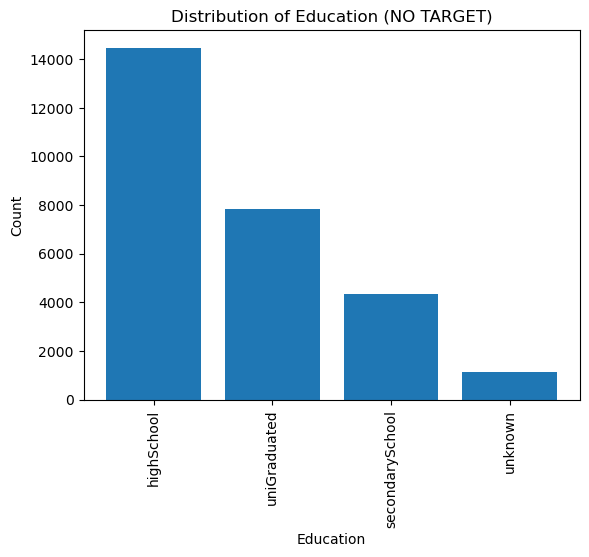

In [18]:
edu_counts_no = no_target['education'].value_counts()

# Plotting the bar chart
plt.bar(range(len(edu_counts_no)), edu_counts_no.values)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education (NO TARGET)')
plt.xticks(range(len(edu_counts_no)), edu_counts_no.index, rotation=90)
plt.show()

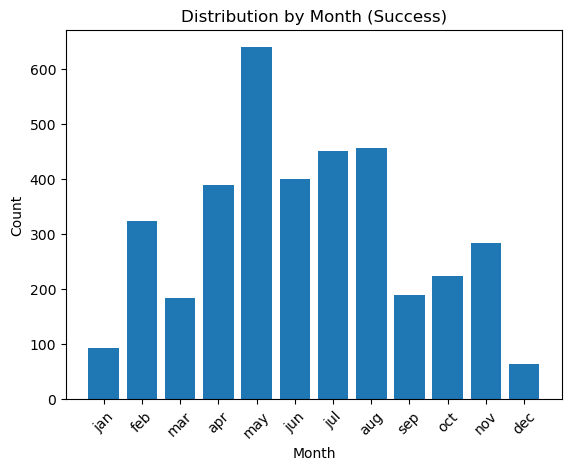

In [19]:
month_counts = yes_target['month'].value_counts()


sorted_months = sorted(month_counts.index, key=lambda x: pd.to_datetime(x, format='%b').month)

plt.bar(sorted_months, month_counts[sorted_months])
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution by Month (Success)')
plt.xticks(rotation=45)
plt.show()

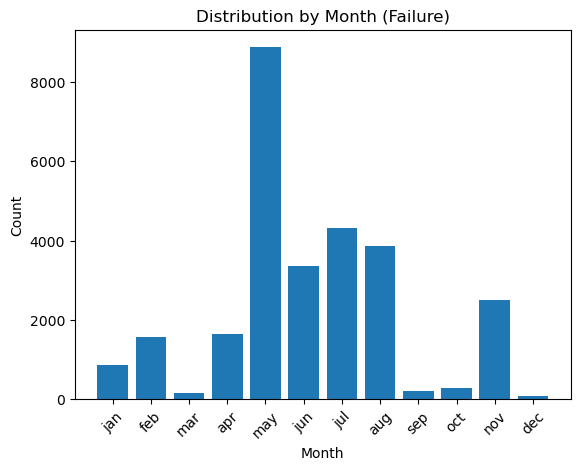

In [20]:
month_counts_no = no_target['month'].value_counts()

sorted_months_no = sorted(month_counts_no.index, key=lambda x: pd.to_datetime(x, format='%b').month)

plt.bar(sorted_months_no, month_counts_no[sorted_months_no])
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution by Month (Failure)')
plt.xticks(rotation=45)
plt.show()

May has the highest failure and success rate. Dec has the lowest.

Text(0.5, 0, 'age distribution of customers')

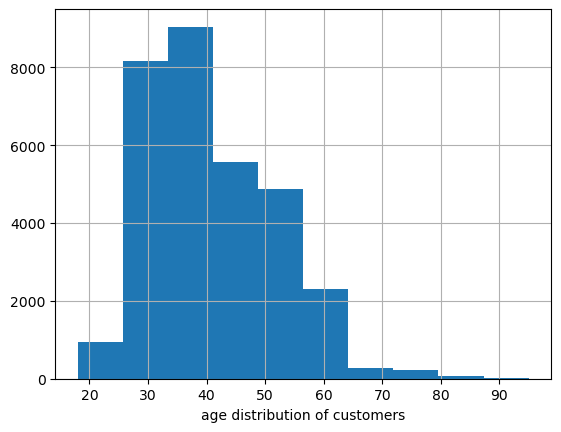

In [21]:
marketing_data['age'].hist()
plt.xlabel('age distribution of customers')

Text(0.5, 0, 'age distribution of customers (success)')

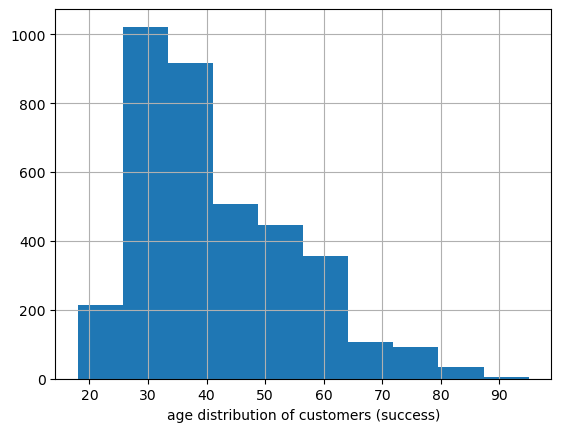

In [22]:
yes_target['age'].hist()
plt.xlabel('age distribution of customers (success)')

Text(0.5, 0, 'age distribution of customers (failed)')

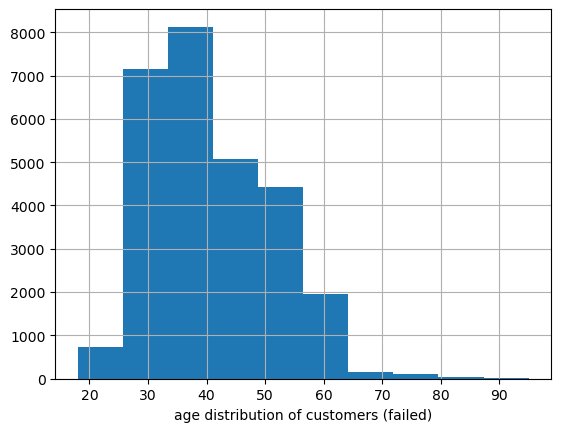

In [23]:
no_target['age'].hist()
plt.xlabel('age distribution of customers (failed)')

Success rate is higher than the failure rate for the customers under the age of 30 and higher than 60.

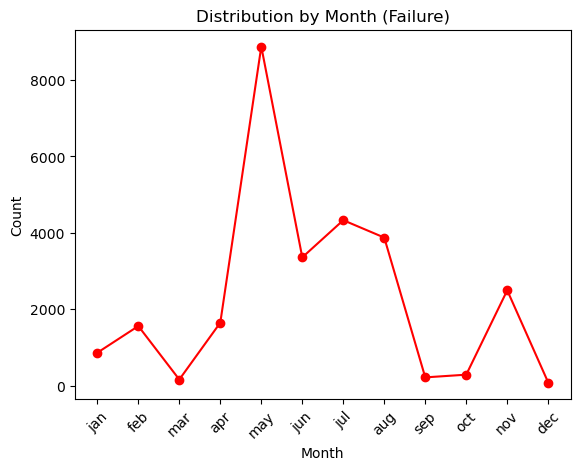

In [27]:
month_counts_no = no_target['month'].value_counts()

sorted_months_no = sorted(month_counts_no.index, key=lambda x: pd.to_datetime(x, format='%b').month)

plt.plot(sorted_months_no, month_counts_no[sorted_months_no], marker='o', color='red')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution by Month (Failure)')
plt.xticks(rotation=45)
plt.show()

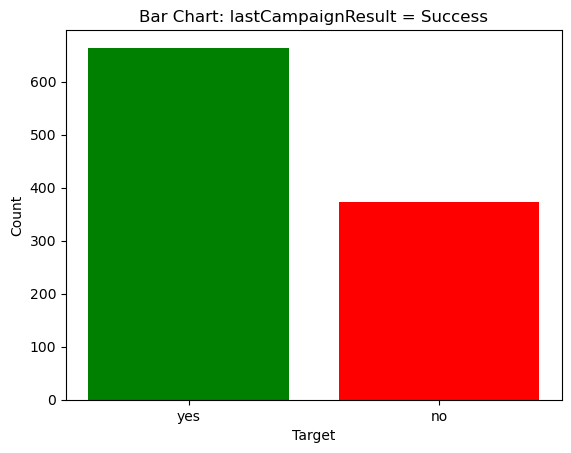

In [30]:
previous_success = marketing_data[(marketing_data['lastCampaignResult'] == 'success')]

# Count the occurrences of each target value
target_counts = previous_success['target'].value_counts()

# Plotting the bar chart
plt.bar(target_counts.index, target_counts.values, color=target_counts.index.map({'yes': 'green', 'no': 'red'}))

plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Bar Chart: lastCampaignResult = Success')
plt.show()

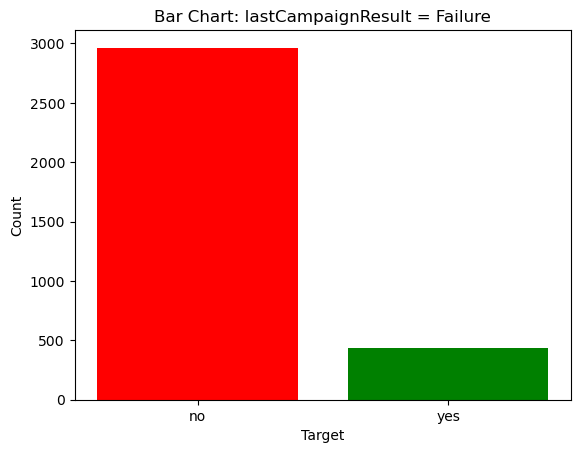

In [31]:
previous_fail = marketing_data[(marketing_data['lastCampaignResult'] == 'failure')]

# Count the occurrences of each target value
target_counts = previous_fail['target'].value_counts()

# Plotting the bar chart
plt.bar(target_counts.index, target_counts.values, color=target_counts.index.map({'yes': 'green', 'no': 'red'}))

plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Bar Chart: lastCampaignResult = Failure')
plt.show()

To go a step deeper, I will group the customers based on their feedback from the last campaign as well as the latest campaign. The number of groups will include:

1. Super Positive Customers: customers that have converted both previous and current
2. New Positive Customers: customers that were unknown in the previous and converted in the current
3. Negative to Positive: customers that did not convert in the previous campaign and converted in the current
4. Super Negative Customers: customers that did not convert in the previous and did not convert in the current
5. New Negative Customers: customers that were unknown in the previous and did not convert in the current
6. Positive to Negative: customers that converted in the previous and did not convert in the current

In [32]:
marketing_data['groups'] = ''
marketing_data.head()

,id,target,day,month,duration,contactId,age,gender,job,maritalStatus,...,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult,groups
0,432148809,no,27,may,166,623,30,female,worker,married,...,no,-202,no,no,unknown,2,-1.0,0,unknown,
1,432184318,no,26,oct,183,1992,42,female,manager,married,...,no,2463,no,no,cellPhone,2,-1.0,0,unknown,
2,432182482,no,5,jun,227,2778,26,female,services,single,...,no,2158,yes,yes,landline,1,-1.0,0,unknown,
3,432150520,no,2,jun,31,3070,34,male,unemployed,divorced,...,yes,75,yes,no,unknown,3,-1.0,0,unknown,
4,432145870,no,15,may,1231,6583,48,male,worker,married,...,no,559,yes,no,unknown,2,-1.0,0,unknown,


In [46]:
marketing_data.loc[(marketing_data['target'] == 'yes') & (marketing_data['lastCampaignResult'] == 'success'), 'groups'] = 'Super Positive'
marketing_data.loc[(marketing_data['target'] == 'yes') & (marketing_data['lastCampaignResult'] == 'unknown'), 'groups'] = 'New Positive'
marketing_data.loc[(marketing_data['target'] == 'yes') & (marketing_data['lastCampaignResult'] == 'failure'), 'groups'] = 'Negative to Positive'
marketing_data.loc[(marketing_data['target'] == 'no') & (marketing_data['lastCampaignResult'] == 'success'), 'groups'] = 'Positive to Negative'
marketing_data.loc[(marketing_data['target'] == 'no') & (marketing_data['lastCampaignResult'] == 'unknown'), 'groups'] = 'New Negative'
marketing_data.loc[(marketing_data['target'] == 'no') & (marketing_data['lastCampaignResult'] == 'failure'), 'groups'] = 'Super Negative'

In [47]:
marketing_data['groups'].value_counts()

New Negative            23372
Super Negative           2964
New Positive             2374
                         1294
Super Positive            664
Negative to Positive      439
Positive to Negative      373
Name: groups, dtype: int64

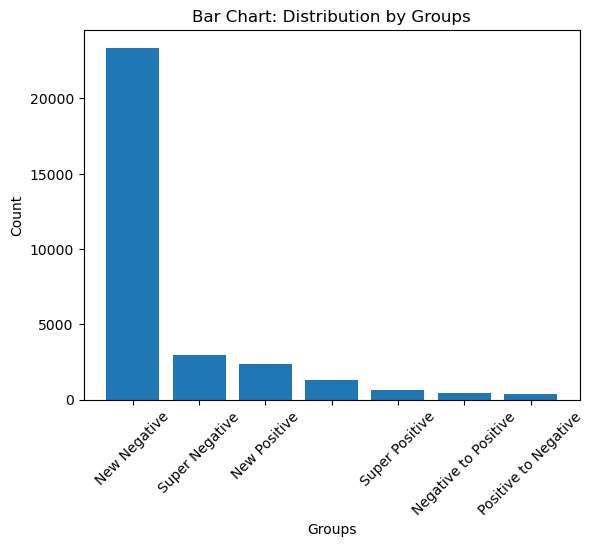

In [48]:
group_counts = marketing_data['groups'].value_counts()
plt.bar(group_counts.index, group_counts.values)
plt.xlabel('Groups')
plt.ylabel('Count')
plt.title('Bar Chart: Distribution by Groups')
plt.xticks(rotation=45)
plt.show()

Customers that were unknown in the previous and did not convert in the current are the highest,
second highest are customers that did not convert in the previous nor the current campaign,
third are customers who have never been targeted who converted this campaign.

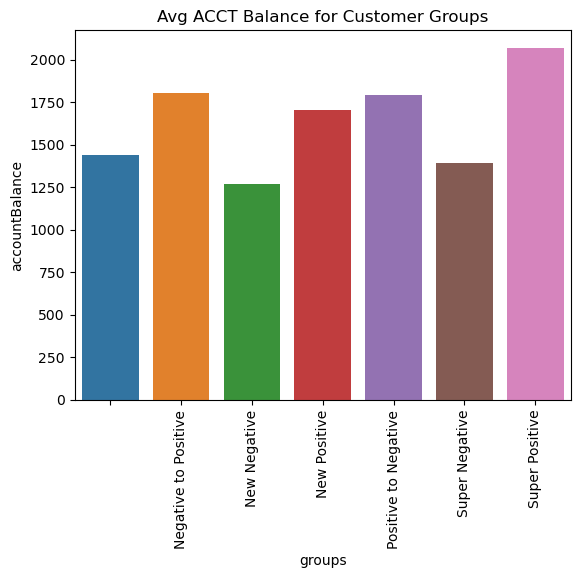

In [51]:
acct_bal_group = marketing_data.groupby('groups', as_index=False)['accountBalance'].mean()
                                        
ax = sns.barplot(y='accountBalance', x='groups', data=acct_bal_group)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Avg ACCT Balance for Customer Groups')
plt.show()

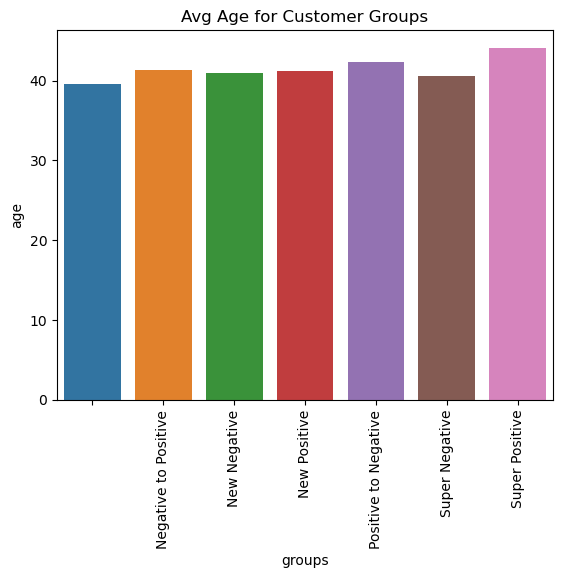

In [53]:
age_group = marketing_data.groupby('groups', as_index=False)['age'].mean()
                                        
ax = sns.barplot(y='age', x='groups', data=age_group)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Avg Age for Customer Groups')
plt.show()

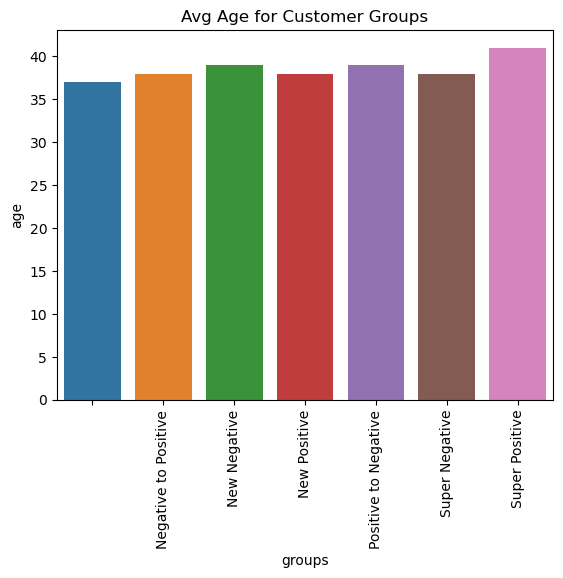

In [55]:
age_group = marketing_data.groupby('groups', as_index=False)['age'].median()
                                        
ax = sns.barplot(y='age', x='groups', data=age_group)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Avg Age for Customer Groups')
plt.show()

<AxesSubplot:>

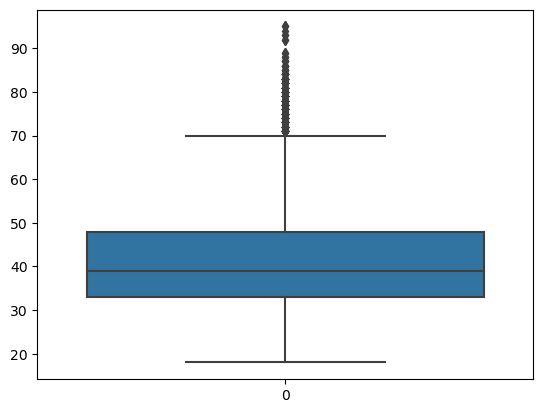

In [56]:
sns.boxplot(data=marketing_data['age'])

<AxesSubplot:>

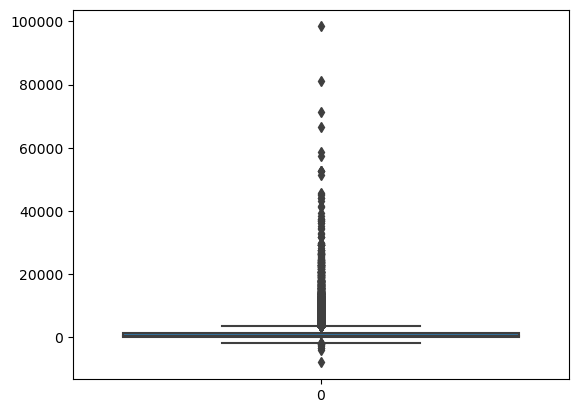

In [57]:
sns.boxplot(data=marketing_data['accountBalance'])

Text(0.5, 1.0, 'Scatter Plot: Age vs Account Balance')

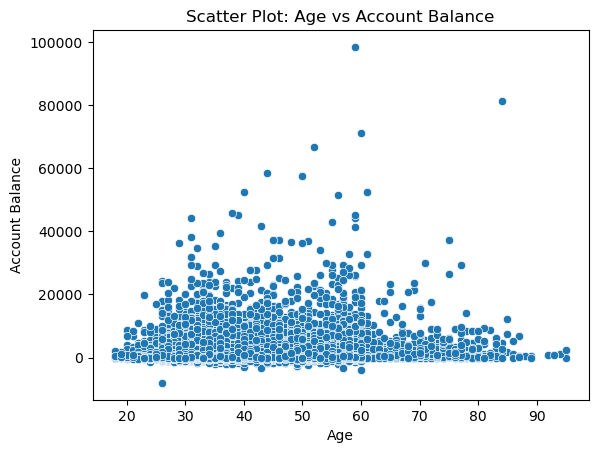

In [58]:
sns.scatterplot(data=marketing_data, x='age', y='accountBalance')

plt.xlabel('Age')
plt.ylabel('Account Balance')
plt.title('Scatter Plot: Age vs Account Balance')

In [59]:
print(marketing_data[marketing_data['accountBalance'] > 60000])

              id target  day month  duration  contactId  age  gender      job  \
1227   432184040     no    6   oct       205    2657442   60  female  retired   
7672   432185740    yes    1   apr       390   16619863   84  female  retired   
12809  432163539     no   14   aug       109   28059502   52    male   worker   
25480  432168574     no   20   nov       145   56135495   59  female  manager   

      maritalStatus  ... creditFailure accountBalance  house credit  \
1227        married  ...            no          71188     no     no   
7672        married  ...            no          81204     no     no   
12809       married  ...            no          66653     no     no   
25480       married  ...            no          98417     no     no   

      contactType numberOfContacts  daySinceLastCampaign  \
1227    cellPhone                1                  -1.0   
7672     landline                1                  94.0   
12809   cellPhone                3                  -1.0  

In [60]:
marketing_data = marketing_data[marketing_data['accountBalance'] <= 60000]

Text(0.5, 1.0, 'Scatter Plot: Age vs Account Balance')

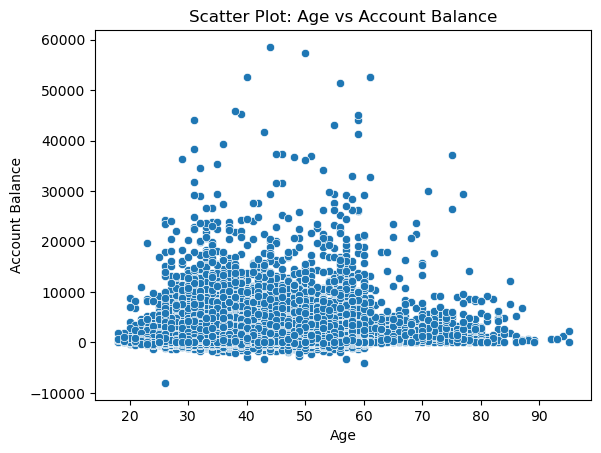

In [61]:
sns.scatterplot(data=marketing_data, x='age', y='accountBalance')

plt.xlabel('Age')
plt.ylabel('Account Balance')
plt.title('Scatter Plot: Age vs Account Balance')

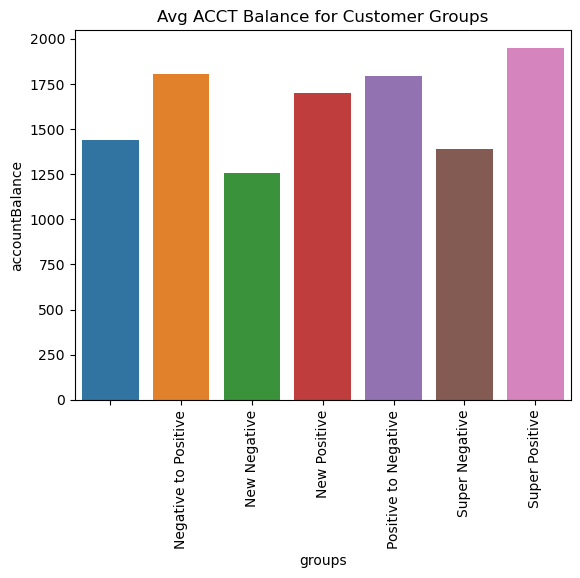

In [62]:
age_group = marketing_data.groupby('groups', as_index=False)['age'].mean()
                                        
ax = sns.barplot(y='age', x='groups', data=age_group)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Avg Age for Customer Groups')
plt.show()

We can see that most of the customers who have converted via one of the campaigns all have higher account balances.

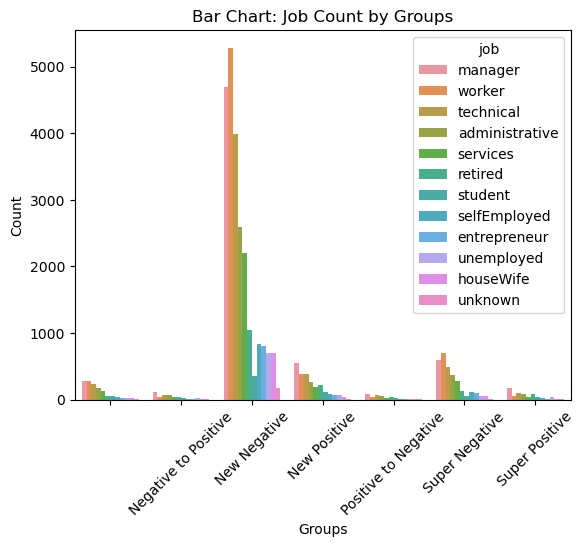

In [64]:
occupation_counts = marketing_data.groupby('groups')['job'].value_counts().reset_index(name='count')
sns.barplot(data=occupation_counts, x='groups', y='count', hue='job')

plt.xlabel('Groups')
plt.ylabel('Count')
plt.title('Bar Chart: Job Count by Groups')
plt.xticks(rotation=45)
plt.show()

New negative workers is top ranked for New Negative, followed by manager. Student is ranked the lowest.


Let's remove the New Negatives and look at the rest of the groups.

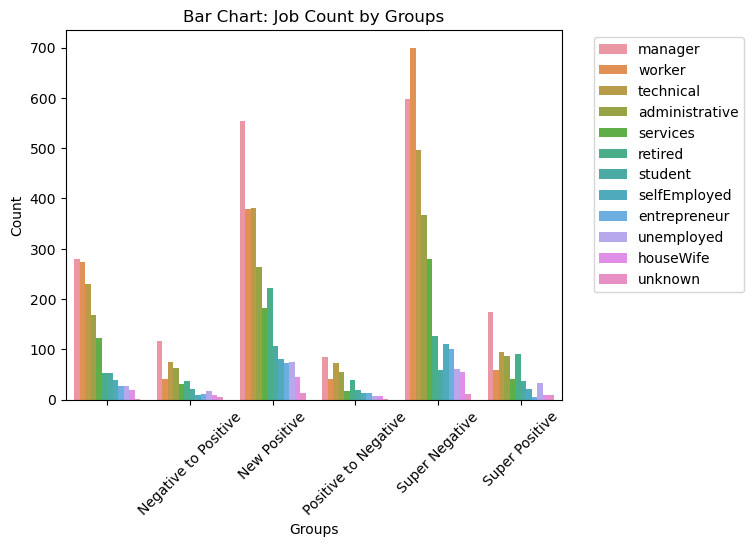

In [67]:
occupation_counts2 = marketing_data.groupby('groups')['job'].value_counts().reset_index(name='count')

occupation_counts2 = occupation_counts[occupation_counts['groups'] != 'New Negative']

sns.barplot(data=occupation_counts2, x='groups', y='count', hue='job')

plt.xlabel('Groups')
plt.ylabel('Count')
plt.title('Bar Chart: Job Count by Groups')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Negative to Positive: manager is ranked the highest. Self employed and housewife seem to rank the lowest.

New Positive: manager, once again ranks the highest and housewife as the lowest.

Positive to Negative: manager is ranked the highest with unemployed and housewife as the lowest.

Super Negative: Worker ranks the highest and retired and housewife at the lowest.

Super Positive: Manager ranks the highest and entrepreneur as the lowest.

It seems like most of the groups have manager as the leading ranking.

In [69]:
marketing_data.columns

Index(['id', 'target', 'day', 'month', 'duration', 'contactId', 'age',
       'gender', 'job', 'maritalStatus', 'education', 'creditFailure',
       'accountBalance', 'house', 'credit', 'contactType', 'numberOfContacts',
       'daySinceLastCampaign', 'numberOfContactsLastCampaign',
       'lastCampaignResult', 'groups'],
      dtype='object')

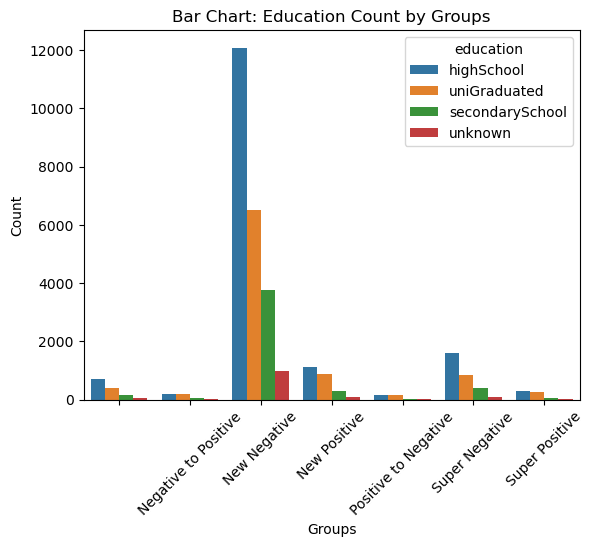

In [70]:
edu_counts = marketing_data.groupby('groups')['education'].value_counts().reset_index(name='count')
sns.barplot(data=edu_counts, x='groups', y='count', hue='education')

plt.xlabel('Groups')
plt.ylabel('Count')
plt.title('Bar Chart: Education Count by Groups')
plt.xticks(rotation=45)
plt.show()

Highest education count for almost all of the groups come from high school graduated followed by uni graduated. Let's focus in on Super Negative and Super Positives.

In [71]:
edu_counts = marketing_data.groupby('groups')['education'].value_counts().reset_index(name='count')
filtered_edu_counts = edu_counts[edu_counts['groups'].isin(['Super Negative', 'Super Positive'])]
group_totals = filtered_edu_counts.groupby('groups')['count'].sum()
filtered_edu_counts['percentage'] = filtered_edu_counts.apply(lambda row: row['count'] / group_totals[row['groups']] * 100, axis=1)
print(filtered_edu_counts)

            groups        education  count  percentage
20  Super Negative       highSchool   1605   54.149798
21  Super Negative     uniGraduated    857   28.913630
22  Super Negative  secondarySchool    399   13.461538
23  Super Negative          unknown    103    3.475034
24  Super Positive       highSchool    302   45.550528
25  Super Positive     uniGraduated    277   41.779789
26  Super Positive  secondarySchool     49    7.390649
27  Super Positive          unknown     35    5.279035


/var/folders/s1/tlccbrh56tl749vyv08rkw4h0000gn/T/ipykernel_86936/3309812524.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_edu_counts['percentage'] = filtered_edu_counts.apply(lambda row: row['count'] / group_totals[row['groups']] * 100, axis=1)


In [73]:
marketing_data.to_csv('marketing_data2.csv', index=False)